### 목표
- 어떤 사람이 일년에 개인 수입이 $50k 달러 초과인지 예측해보자.

In [234]:
from matplotlib import font_manager, rc
font_path = 'C:\Windows\Fonts\malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [236]:
submission = pd.read_csv("../data/sample_submission.csv")
train = pd.read_csv("../data/train.csv", index_col='no')
test = pd.read_csv("../data/test.csv", index_col='no')

In [237]:
print("데이터 확인", train.shape)
print("데이터 확인", test.shape)
print("데이터 확인", submission.shape)

데이터 확인 (29305, 15)
데이터 확인 (19537, 14)
데이터 확인 (19537, 2)


### 2.데이터 전처리

In [238]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

#### 2.1 데이터 정보확인(결측값 존재여부 확인)

#### 2.1.1 age 확인

In [239]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [240]:
train['age']=train['age']//10*10
train['age']

no
1        20
2        30
3        30
4        60
5        20
         ..
29301    20
29302    20
29303    10
29304    30
29305    60
Name: age, Length: 29305, dtype: int64

In [241]:
#test도 동일하게 맞쳐주기
test['age'] = test['age']//10*10
test['age']

no
29306    10
29307    20
29308    40
29309    40
29310    40
         ..
48838    40
48839    40
48840    60
48841    10
48842    30
Name: age, Length: 19537, dtype: int64

In [242]:
test['age'] = pd.cut(test['age'], bins=bin, labels=label)

In [243]:
bin = [-np.inf,10,20,30,40,50,60,70,80,91]
label = ["10대","20대","30대","40대","50대","60대","70대","80대","90대"]
train['age'] = pd.cut(train['age'], bins=bin, labels=label)

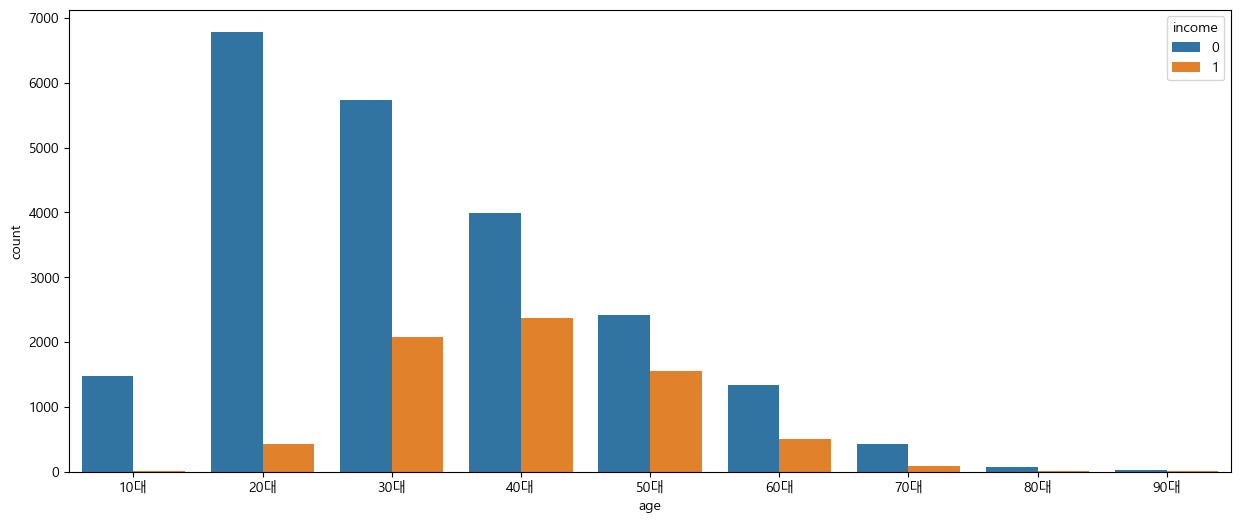

In [244]:
plt.figure(figsize=(15,6))
sns.countplot(train,x='age', hue='income')
plt.show()

#### 2.1.2.workclass

In [245]:
train['workclass']

no
1                  Private
2                  Private
3                  Private
4                  Private
5                  Private
               ...        
29301              Private
29302              Private
29303     Self-emp-not-inc
29304              Private
29305                    ?
Name: workclass, Length: 29305, dtype: object

In [246]:
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [247]:
# private 빼고
temp =train[train['workclass']!=' Private']

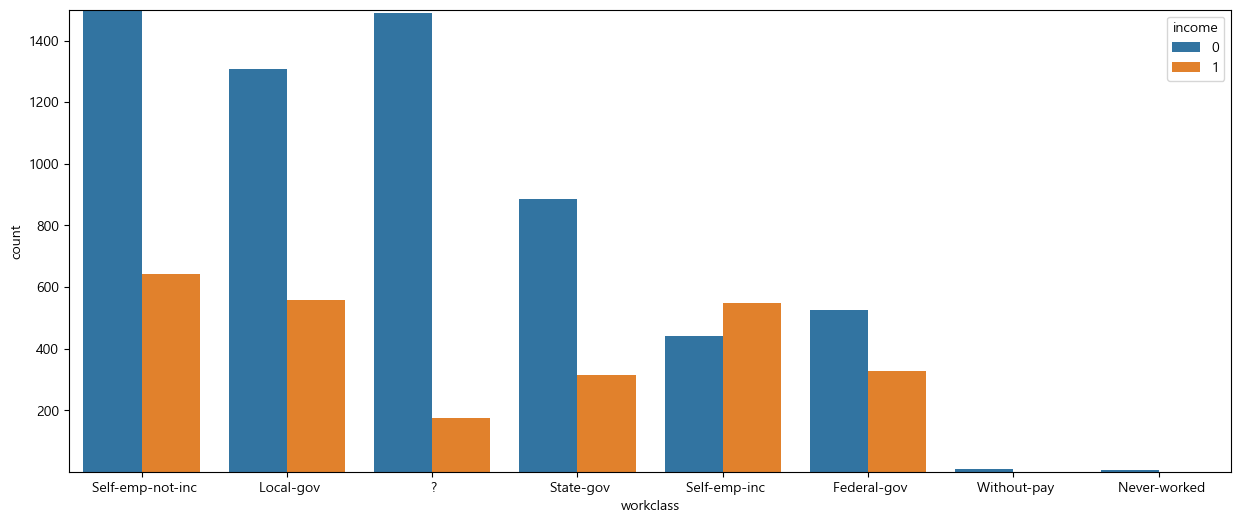

In [248]:
# income과 연관 있는지

plt.figure(figsize=(15,6))
sns.countplot(data=temp, x='workclass', hue='income')
plt.ylim(1,1500)
plt.show()

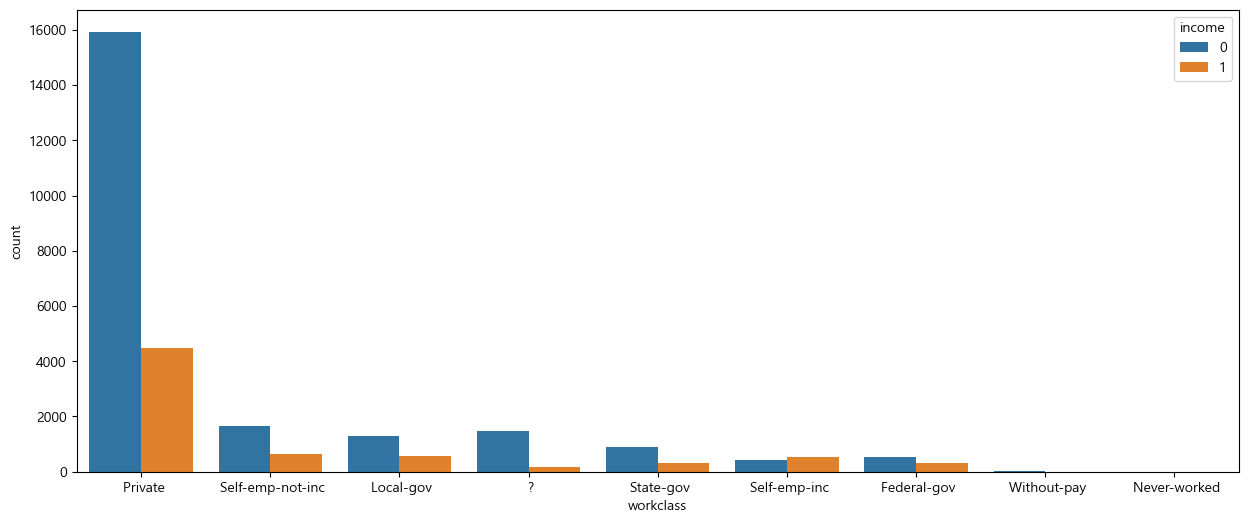

In [249]:
# income과 연관 있는지

plt.figure(figsize=(15,6))
sns.countplot(data=train, x='workclass', hue='income')
plt.show()

In [250]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

##### 2.1.1.1.workclass 범주화

In [251]:
test['workclass'].head()

no
29306                    ?
29307              Private
29308              Private
29309     Self-emp-not-inc
29310              Private
Name: workclass, dtype: object

In [252]:
# train-title
title =[' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Federal-gov',' Self-emp-inc', ' Without-pay', ' Never-worked']
cvt_title = ['normal']*6+['other']+['noincome']*2
cvt_title

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'other',
 'noincome',
 'noincome']

In [253]:
#dict 
title_dict =dict(zip(title,cvt_title))
train['workclass']=train['workclass'].map(title_dict)

In [254]:
train['workclass'].value_counts()

normal      28301
other         987
noincome       17
Name: workclass, dtype: int64

In [255]:
test['workclass'].unique()

array([' ?', ' Private', ' Self-emp-not-inc', ' Local-gov',
       ' Self-emp-inc', ' State-gov', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [256]:
title2 = [' ?', ' Private', ' Self-emp-not-inc', ' Local-gov',
        ' State-gov', ' Federal-gov',' Self-emp-inc', ' Without-pay',
       ' Never-worked']
cvt_title2 = ['normal']*6+['other']+['noincome']*2

#dict 
title_dict2 =dict(zip(title2,cvt_title2))
test['workclass']=test['workclass'].map(title_dict2)

In [257]:
test['workclass'].head(10)

no
29306    normal
29307    normal
29308    normal
29309    normal
29310    normal
29311    normal
29312    normal
29313     other
29314    normal
29315    normal
Name: workclass, dtype: object

In [258]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

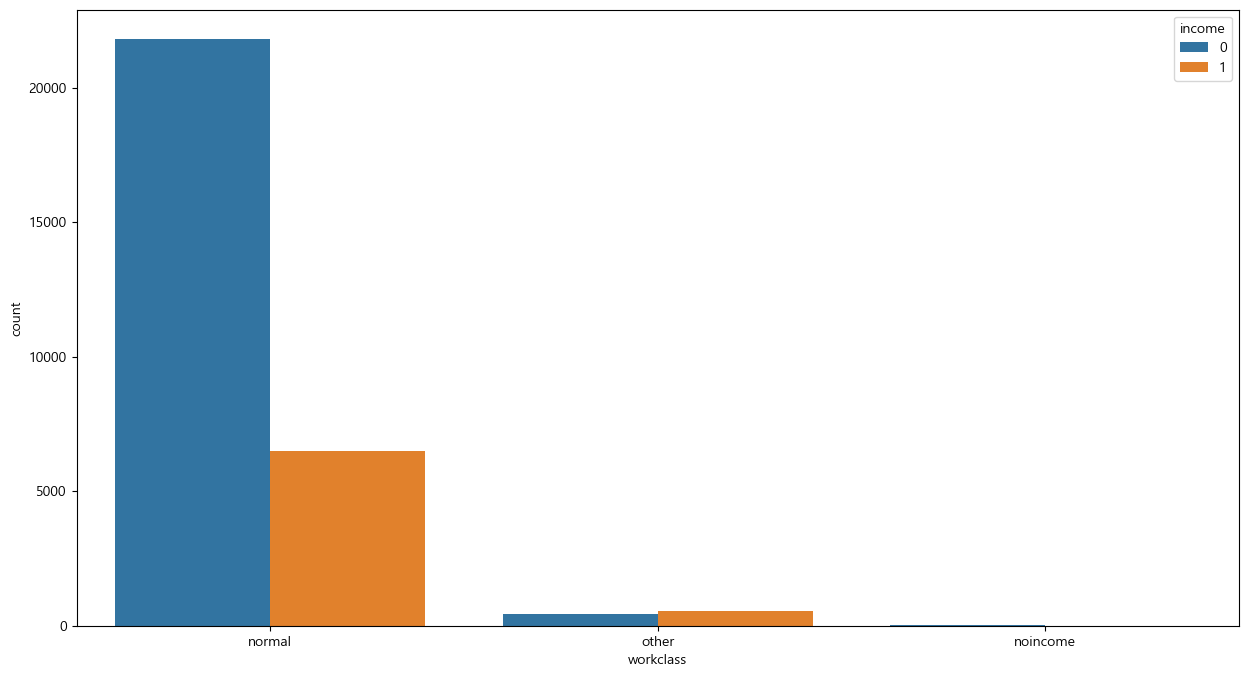

In [259]:
plt.figure(figsize=(15,8))
sns.countplot(train, x='workclass', hue='income')
plt.show()


In [264]:
temp = train['education-num'].unique()

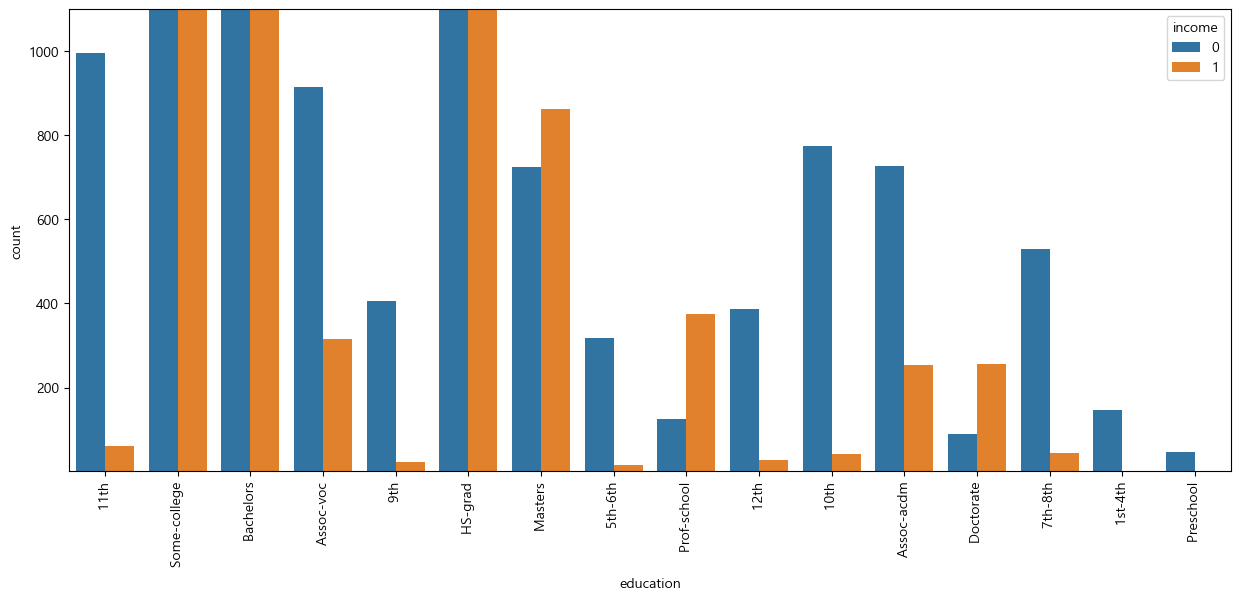

In [276]:
plt.figure(figsize=(15,6))
sns.countplot(train, x='education', hue='income')
plt.ylim(1,1100)
plt.xticks(rotation=90)
plt.show()

In [274]:
train['education'].unique()

array([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
       ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
       ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [ ]:
edu_dict = {
    ' Preschool':'level0',
    ' 1st-4th' : 'level1',
    ' 5st-6th' : 'level1',
    ' 7st-8th' : 'level1',
    ' 9th' : 'level2',
    ' 10th' : 'level2',
    ' 11th' : 'level2',
    ' 12th' : 'level2',
    ' Assoc-acdm':'level3',
    ' Assoc-voc' : 'level3'
}